# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [13]:
# Load pickled data
import pickle
import os
import pandas as pd
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

print("Path where Data of this project are stored")
print(os.getcwd())

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

testclasses = pd.Series(y_train)
unique_classes = testclasses.unique()
counts=testclasses.value_counts(sort=False)
counts_sorted=counts.sort_index()
print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))
print("Number of classes: ", len(unique_classes))

print(counts_sorted)

Path where Data of this project are stored
/home/carnd/CarND-LeNet-Lab/CarND-Traffic-Sign-Classifier-Project

Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples
Number of classes:  43
0      180
1     1980
2     2010
3     1260
4     1770
5     1650
6      360
7     1290
8     1260
9     1320
10    1800
11    1170
12    1890
13    1920
14     690
15     540
16     360
17     990
18    1080
19     180
20     300
21     270
22     330
23     450
24     240
25    1350
26     540
27     210
28     480
29     240
30     390
31     690
32     210
33     599
34     360
35    1080
36     330
37     180
38    1860
39     270
40     300
41     210
42     210
dtype: int64


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

## Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

### Include an exploratory visualization of the dataset

### View a sample of the data set

10
uint8
(34799,)


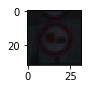

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

print(y_train[index])
print(y_train[index].dtype)
print(y_train.shape)
plt.figure(figsize=(1,1))
plt.imshow(image)
plt.show()


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### Plotting the count of each sign

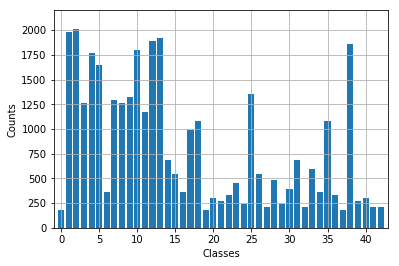

In [15]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.axis([-1, 43, 0, 2200])
plt.bar( np.arange(43), counts_sorted, align='center' )
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.grid(True)
plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Augmentation

#### Classes with less than 1,000 samples

In [17]:
scarce=[]

for index in range (0,len(counts_sorted)):
    if counts_sorted[index]<1000:
        scarce.append(index)
    
print(scarce)

for id in range (0,43):
    if id not in scarce:
        print(id,"OVER one thousand")
    if id in scarce:
        print(id,"UNDER or EQUALS to thousand")

[0, 6, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 39, 40, 41, 42]
0 UNDER or EQUALS to thousand
1 OVER one thousand
2 OVER one thousand
3 OVER one thousand
4 OVER one thousand
5 OVER one thousand
6 UNDER or EQUALS to thousand
7 OVER one thousand
8 OVER one thousand
9 OVER one thousand
10 OVER one thousand
11 OVER one thousand
12 OVER one thousand
13 OVER one thousand
14 UNDER or EQUALS to thousand
15 UNDER or EQUALS to thousand
16 UNDER or EQUALS to thousand
17 UNDER or EQUALS to thousand
18 OVER one thousand
19 UNDER or EQUALS to thousand
20 UNDER or EQUALS to thousand
21 UNDER or EQUALS to thousand
22 UNDER or EQUALS to thousand
23 UNDER or EQUALS to thousand
24 UNDER or EQUALS to thousand
25 OVER one thousand
26 UNDER or EQUALS to thousand
27 UNDER or EQUALS to thousand
28 UNDER or EQUALS to thousand
29 UNDER or EQUALS to thousand
30 UNDER or EQUALS to thousand
31 UNDER or EQUALS to thousand
32 UNDER or EQUALS to thousand
33 UNDER or EQUALS t

#### Classes with less than 500 samples

In [19]:
veryscarce=[]

for index in range (0,len(counts_sorted)):
    if counts_sorted[index]<500:
        veryscarce.append(index)
    
print(veryscarce)

for id in range (0,43):
    if id not in veryscarce:
        print(id,"OVER five hundreds")
    if id in veryscarce:
        print(id,"UNDER or EQUALS to five hundreds")

[0, 6, 16, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 32, 34, 36, 37, 39, 40, 41, 42]
0 UNDER or EQUALS to five hundreds
1 OVER five hundreds
2 OVER five hundreds
3 OVER five hundreds
4 OVER five hundreds
5 OVER five hundreds
6 UNDER or EQUALS to five hundreds
7 OVER five hundreds
8 OVER five hundreds
9 OVER five hundreds
10 OVER five hundreds
11 OVER five hundreds
12 OVER five hundreds
13 OVER five hundreds
14 OVER five hundreds
15 OVER five hundreds
16 UNDER or EQUALS to five hundreds
17 OVER five hundreds
18 OVER five hundreds
19 UNDER or EQUALS to five hundreds
20 UNDER or EQUALS to five hundreds
21 UNDER or EQUALS to five hundreds
22 UNDER or EQUALS to five hundreds
23 UNDER or EQUALS to five hundreds
24 UNDER or EQUALS to five hundreds
25 OVER five hundreds
26 OVER five hundreds
27 UNDER or EQUALS to five hundreds
28 UNDER or EQUALS to five hundreds
29 UNDER or EQUALS to five hundreds
30 UNDER or EQUALS to five hundreds
31 OVER five hundreds
32 UNDER or EQUALS to five hundreds
33 OV

In [20]:
under_one_thousand=0

for index in range (0,len(y_train)):
    if y_train[index] in scarce:
        under_one_thousand=under_one_thousand+1

print(under_one_thousand)

10109


In [21]:
under_fivehundreds=0

for index in range (0,len(y_train)):
    if y_train[index] in veryscarce:
        under_fivehundreds=under_fivehundreds+1

print(under_fivehundreds)        

6060


#### Brightness

In [9]:
X_train_bright=np.uint8(np.zeros((under_one_thousand,32,32,3)))
y_train_bright=np.zeros((under_one_thousand))
X_flat=np.uint8(np.zeros((under_one_thousand,3072)))
X_bf=np.uint8(np.zeros((under_one_thousand,3072)))

brightness=50

ind_bri=0

for index in range (0,len(X_train)):
    if y_train[index] in scarce:
        y_train_bright[ind_bri]=np.uint8(y_train[index])
        X_flat[ind_bri]=X_train[index].flatten()
        ind_bri=ind_bri+1
        for a in range (0,3072):
            if X_flat[ind_bri-1][a]<=(255-brightness):
                X_bf[ind_bri-1][a]=np.uint8(X_flat[ind_bri-1][a]+brightness)
            else:
                X_bf[ind_bri-1][a]=np.uint8(255)

for index in range (0,len(X_bf)):
    X_train_bright[index]=np.reshape(X_bf[index],(32,32,3))

print(X_train_bright.dtype)
print(X_train_bright.shape)
print(y_train_bright.shape)

uint8
(10109, 32, 32, 3)
(10109,)


10109


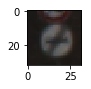

(32, 32, 3)
uint8


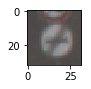

(32, 32, 3)
uint8


In [10]:
print(ind_bri)
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], vmin=0, vmax=255)
plt.show()
print(X_train[0].shape)
print(X_train[0].dtype)
plt.figure(figsize=(1,1))
plt.imshow(X_train_bright[0], vmin=0, vmax=255)
plt.show()
print(X_train_bright[0].shape)
print(X_train_bright[0].dtype)

#### Blurring

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import gaussian_filter

X_train_blurred=np.uint8(np.zeros((under_fivehundreds,32,32,3)))
y_train_blurred=np.zeros((under_fivehundreds))

ind_blur=0

for index in range (0,(len(X_train))):
    if y_train[index] in veryscarce:
        X_train_blurred[ind_blur]=np.uint8(gaussian_filter(X_train[index],1))
        y_train_blurred[ind_blur]=np.uint8(y_train[index])
        ind_blur=ind_blur+1

print(X_train_blurred.dtype)
print(X_train_blurred.shape)

uint8
(6060, 32, 32, 3)


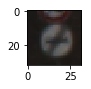

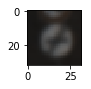

In [23]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], vmin=0, vmax=255)
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(X_train_blurred[0], vmin=0, vmax=255)
plt.show()

### Rotation

In [25]:
from scipy.ndimage import rotate

X_train_rotated=np.zeros((under_fivehundreds,32,32,3))
y_train_rotated=np.zeros((under_fivehundreds))

ind_rot=0

for index in range (0,(len(X_train))):
    if y_train[index] in veryscarce:
        X_train_rotated[ind_rot]=rotate(X_train[index], 25,reshape=False)
        y_train_rotated[ind_rot]=np.uint8(y_train[index])
        ind_rot=ind_rot+1

print(X_train_rotated.dtype)
print(X_train_rotated.shape)

float64
(6060, 32, 32, 3)


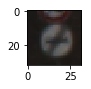

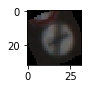

In [27]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], vmin=0, vmax=255)
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(np.uint8(X_train_rotated[0]), vmin=0, vmax=255)
plt.show()

### Flipping

In [28]:
agito = testclasses.to_frame('class')
groupped = agito.groupby('class').head(100)

In [29]:
X_train_flipped=np.zeros((4300,32,32,3))
y_train_flipped=np.zeros((4300))

ind_fli=0

for index in range (0,(len(X_train))):
    if index in groupped.index:
        X_train_flipped[ind_fli]=np.flipud(X_train[index])
        y_train_flipped[ind_fli]=np.uint8(y_train[index])
        ind_fli=ind_fli+1

print(X_train_flipped.dtype)
print(X_train_flipped.shape)


float64
(4300, 32, 32, 3)


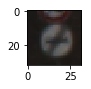

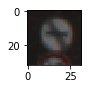

In [30]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], vmin=0, vmax=255)
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(np.uint8(X_train_flipped[0]), vmin=0, vmax=255)
plt.show()

### Randomly rotate 100 images per class

In [32]:
from scipy.ndimage import rotate
from random import randint

X_train_rr=np.zeros((4300,32,32,3))
y_train_rr=np.zeros((4300))

ind_rr=0

for index in range (0,(len(X_train))):
     if index in groupped.index:
            randeg=randint(-45,45)
            X_train_rr[ind_rr]=rotate(X_train[index], randeg,reshape=False)
            y_train_rr[ind_rr]=np.uint8(y_train[index])
            ind_rr=ind_rr+1

print(X_train_rr.dtype)
print(X_train_rr.shape)
print(y_train_rr.shape)

float64
(4300, 32, 32, 3)
(4300,)


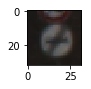

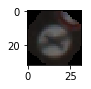

In [33]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], vmin=0, vmax=255)
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(np.uint8(X_train_rr[0]), vmin=0, vmax=255)
plt.show()

### Blur 150 images per class

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import gaussian_filter

groupie = agito.groupby('class').head(150)

X_train_rb=np.uint8(np.zeros((6450,32,32,3)))
y_train_rb=np.zeros((6450))

ind_rb=0

for index in range (0,(len(X_train))):
     if index in groupie.index:
        X_train_rb[ind_rb]=np.uint8(gaussian_filter(X_train[index],1))
        y_train_rb[ind_rb]=np.uint8(y_train[index])
        ind_rb=ind_rb+1

print(X_train_rb.dtype)
print(X_train_rb.shape)
print(ind_rb)
print(y_train_rb.dtype)

uint8
(6450, 32, 32, 3)
6450
float64


6450


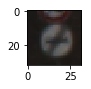

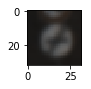

In [35]:
print(ind_rb)
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], vmin=0, vmax=255)
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(X_train_rb[0], vmin=0, vmax=255)
plt.show()

### Concatenation

In [18]:
X_train_aug=np.uint8(np.concatenate((X_train,X_train_bright,X_train_blurred,X_train_rotated,X_train_flipped,X_train_rr,X_train_rb)))
print(X_train_aug.shape)
print(X_train_aug.dtype)


y_train_aug=np.uint8(np.concatenate((y_train,y_train_bright,y_train_blurred,y_train_rotated,y_train_flipped,y_train_rr,y_train_rb)))
print(y_train_aug.shape)
print(y_train_aug.dtype)

(72078, 32, 32, 3)
uint8
(72078,)
uint8


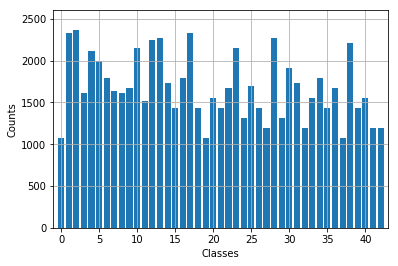

In [19]:
testclassesaug = pd.Series(y_train_aug)
unique_classes_aug = testclassesaug.unique()
counts_aug=testclassesaug.value_counts(sort=False)
counts_sorted_aug=counts_aug.sort_index()

plt.axis([-1, 43, 0, 2600])
plt.bar( np.arange(43), counts_sorted_aug, align='center' )
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

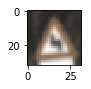

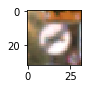

float64
uint8
uint8


In [20]:
ind=745
plt.figure(figsize=(1,1))
plt.imshow(X_train_aug[50000])
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(X_train[124])
plt.show()
print(X_train_rotated[ind].dtype)
print(X_train[ind].dtype)
#print(X_train_rotated[ind][:,0])
z=np.uint8(X_train_rotated[ind])
y=np.uint8(z)
print(z.dtype)
#print(X_train[ind][:,0])

#### Grayscale

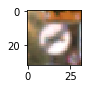

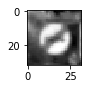

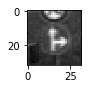

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

X_train_gray = np.zeros((len(X_train_aug),32,32))
X_valid_gray = np.zeros((len(X_valid),32,32))
X_test_gray = np.zeros((len(X_test),32,32))

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

for index in range (0,(len(X_train_aug))):
    X_train_gray[index] = rgb2gray(X_train_aug[index])

for index in range (0,(len(X_valid))):
    X_valid_gray[index] = rgb2gray(X_valid[index])
    
for index in range (0,(len(X_test))):
    X_test_gray[index] = rgb2gray(X_test[index])

plt.figure(figsize=(1,1))
plt.imshow(X_train[124])
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(X_train_gray[124],cmap='gray')
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(X_valid_gray[124],cmap='gray')
plt.show()


#### Normalization

In [23]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

X_train_norm = np.zeros((len(X_train_gray),32,32))
X_valid_norm = np.zeros((len(X_valid_gray),32,32))
X_test_norm = np.zeros((len(X_test_gray),32,32))
print(X_train_gray.shape)
print(X_train_norm.shape)

def normalize(img):
    normalized = (img/128)-1
    return normalized

for index in range (0,len(X_train_gray)):
    X_train_norm[index] = normalize(X_train_gray[index])

for index in range (0,len(X_valid_gray)):
    X_valid_norm[index] = normalize(X_valid_gray[index])

for index in range (0,len(X_test_gray)):
    X_test_norm[index] = normalize(X_test_gray[index])
    
#Add 1 dimension to fit the model
X_train_normexp = np.expand_dims(X_train_norm, axis = 3)
X_valid_normexp = np.expand_dims(X_valid_norm, axis = 3)
X_test_normexp = np.expand_dims(X_test_norm, axis = 3)

print(X_train_norm[124].shape)
print(X_train_normexp[124].shape)

(72078, 32, 32)
(72078, 32, 32)
(32, 32)
(32, 32, 1)


#### Shuffle Data

In [24]:
from sklearn.utils import shuffle

X_train_normexp, y_train_aug = shuffle(X_train_normexp, y_train_aug)

### Model Architecture

In [25]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [3]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 32

#### Old model - LeNet

In [27]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 150.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 150), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(150))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 150. Output = 100.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(150, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 100. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#### New Model - LeNet modified

In [4]:
from tensorflow.contrib.layers import flatten

def LeNet2(x, keep_prob):
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6))
    x = tf.nn.bias_add(x, b1)

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16))
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400))
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    
    # Concatenate layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat_v2([xflat, layer2flat], 1)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(43))    
    logits = tf.add(tf.matmul(x, W4), b4)

    return logits

In [5]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
keep_prob = tf.placeholder(tf.float32)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [6]:
rate = 0.001

logits = LeNet2(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [7]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [32]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [35]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_normexp)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_normexp, y_train_aug = shuffle(X_train_normexp, y_train_aug)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_normexp[offset:end], y_train_aug[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        train_accuracy = evaluate(X_train_normexp,y_train_aug)    
        validation_accuracy = evaluate(X_valid_normexp, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))    
        print()
        
    saver.save(sess, './lasttrafficsignclassifiersaved')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.940
Validation Accuracy = 0.887

EPOCH 2 ...
Training Accuracy = 0.975
Validation Accuracy = 0.925

EPOCH 3 ...
Training Accuracy = 0.987
Validation Accuracy = 0.945

EPOCH 4 ...
Training Accuracy = 0.991
Validation Accuracy = 0.938

EPOCH 5 ...
Training Accuracy = 0.993
Validation Accuracy = 0.938

EPOCH 6 ...
Training Accuracy = 0.991
Validation Accuracy = 0.937

EPOCH 7 ...
Training Accuracy = 0.996
Validation Accuracy = 0.941

EPOCH 8 ...
Training Accuracy = 0.997
Validation Accuracy = 0.946

EPOCH 9 ...
Training Accuracy = 0.998
Validation Accuracy = 0.949

EPOCH 10 ...
Training Accuracy = 0.998
Validation Accuracy = 0.950

EPOCH 11 ...
Training Accuracy = 0.996
Validation Accuracy = 0.947

EPOCH 12 ...
Training Accuracy = 0.998
Validation Accuracy = 0.944

EPOCH 13 ...
Training Accuracy = 0.999
Validation Accuracy = 0.949

EPOCH 14 ...
Training Accuracy = 0.998
Validation Accuracy = 0.957

EPOCH 15 ...
Training Accuracy = 0.998
Valid

### Evaluate the model

In [36]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_normexp, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.938


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

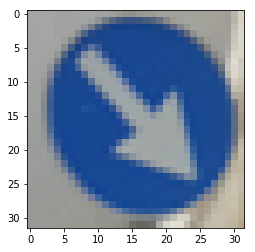

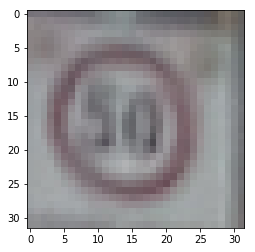

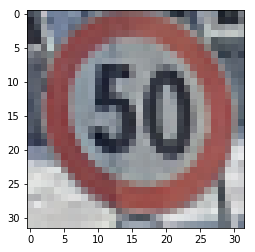

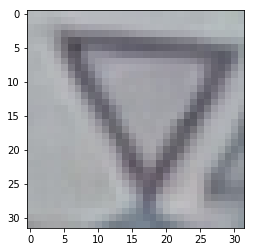

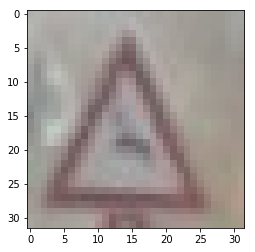

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=32x32 at 0x7F555929E668>
(32, 32, 4)
(32, 32, 3)
(32, 32, 4)
(32, 32, 3)
(32, 32, 4)
(32, 32, 3)
(32, 32, 4)
(32, 32, 3)
(32, 32, 3)
(5, 32, 32, 3)
uint8


<function matplotlib.pyplot.show>

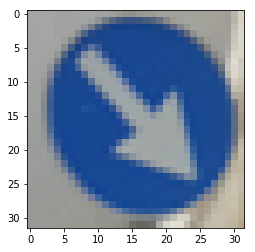

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np
#os.chdir(path)

img1 = Image.open('MyTrafficSigns/Image01.png')
img2 = Image.open('MyTrafficSigns/Image02.png')
img3 = Image.open('MyTrafficSigns/Image03.png')
img4 = Image.open('MyTrafficSigns/Image04.png')
img5 = Image.open('MyTrafficSigns/Image05.png')
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img3)
plt.show()
plt.imshow(img4)
plt.show()
plt.imshow(img5)
plt.show()
print(img5)

img01=np.array((img1))
print(img01.shape)
sign1=np.delete(img01,(3),axis=2)
print(sign1.shape)

img02=np.array((img2))
print(img02.shape)
sign2=np.delete(img02,(3),axis=2)
print(sign2.shape)

img03=np.array((img3))
print(img03.shape)
sign3=np.delete(img03,(3),axis=2)
print(sign3.shape)

img04=np.array((img4))
print(img04.shape)
sign4=np.delete(img04,(3),axis=2)
print(sign4.shape)

sign5=np.array((img5))
print(sign5.shape)

mysigns=np.uint8(np.zeros((5,32,32,3)))
mysigns[0]=sign1
mysigns[1]=sign2
mysigns[2]=sign3
mysigns[3]=sign4
mysigns[4]=sign5
print(mysigns.shape)
print(mysigns.dtype)
plt.imshow(mysigns[0])
plt.show

<function matplotlib.pyplot.show>

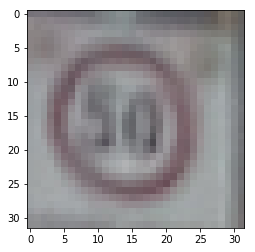

In [28]:
plt.imshow(mysigns[1])
plt.show

### Grayscale and Normalize my images

In [2]:
mysigns_gray = np.zeros((len(mysigns),32,32))

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

for index in range (0,(len(mysigns))):
    mysigns_gray[index] = rgb2gray(mysigns[index])
    
    
mysigns_norm = np.zeros((len(mysigns_gray),32,32))

def normalize(img):
    normalized = (img/128)-1
    return normalized

for index in range (0,len(mysigns_gray)):
    mysigns_norm[index] = normalize(mysigns_gray[index])
    
    
    
mysigns_normexp = (np.expand_dims(mysigns_norm, axis = 3))

print(mysigns_normexp.shape)
print(mysigns_normexp.dtype)

(5, 32, 32, 1)
float64


### Predict the Sign Type for Each Image

In [30]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [9]:
import tensorflow as tf

mylabels = np.uint8((38, 2, 2, 13 ,31))
print(mylabels.shape)
print(mylabels.dtype)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./trafficsignclassifiersaved.meta')
    saver3.restore(sess, "./trafficsignclassifiersaved")
    myaccuracy= evaluate(mysigns_normexp, mylabels)
    print("Test Set Accuracy = {:.3f}".format(myaccuracy))

(5,)
uint8
Test Set Accuracy = 0.600


### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [10]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./trafficsignclassifiersaved.meta')
    saver3.restore(sess, "./trafficsignclassifiersaved")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: mysigns_normexp, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: mysigns_normexp, keep_prob: 1.0})

In [11]:
print(my_top_k[0])

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  9.96179581e-01   3.78374197e-03   3.53277828e-05   8.19087120e-07
    5.69540077e-07]
 [  1.00000000e+00   2.17445972e-09   1.32508324e-22   2.22942189e-23
    1.76571453e-27]
 [  1.00000000e+00   2.49414172e-29   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   9.70950076e-09   7.52558710e-11   1.42445988e-14
    8.99289436e-21]]


In [12]:
print(my_top_k[1])

[[38  0  1  2  3]
 [ 1 21 24 30  2]
 [ 0  1  4  2 38]
 [13 18  0  1  2]
 [31 23 29 21 19]]


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")